# 1. 군집분석 (Clustering)

### 개념
1. 서로 유사한 정도에 따라 다수의 객체를 군집으로 나누는 작업
2. 종속변수 Y가 없는 비지도 학습 기법
3. 전체적인 데이터 구조를 파악하는데 이용 
4. 유사도가 높은 데이터끼리 그룹화 (대표적으로 유클리드 거리식 이용)
5. 군집 간의 분산을 최대화하고, 군집 내의 분산을 최소화하는 방향으로 진행

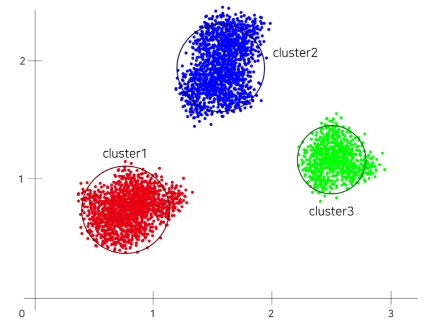

### 종류
1. 계층형 클러스터링과 비계층형 클러스터링으로 분류
2. 계층형 클러스터링
 - 가까운 대상끼리 순차적으로 묶어가는 방법
 - 군집의 개수를 사전에 정하지 않아도 학습을 진행할 수 있음
3. 비계층적 클러스터링
 - 임의의 군집의 개수를 사전에 정하고 그에 맞게 묶음

### K-means Clustering
* 대표적인 비계층적 군집분석 기법으로, 데이터를 K개의 군집으로 묶음
* elbow point를 통해 최적의 k의 개수를 유추할 수 있음
* Expection Step과 Maximization Step으로 구성된 EM 알고리즘을 기반으로 작동함

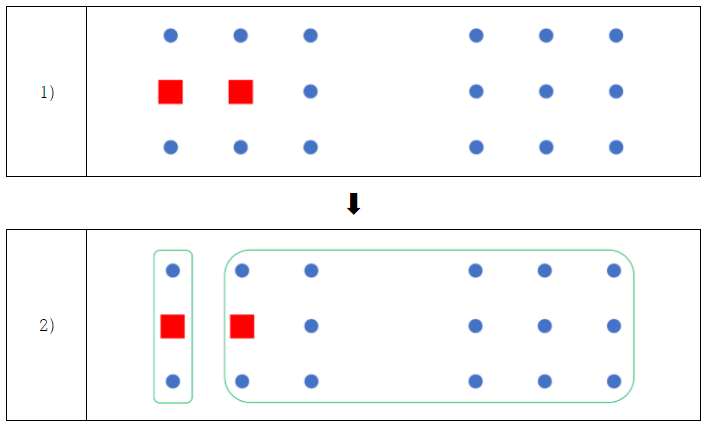
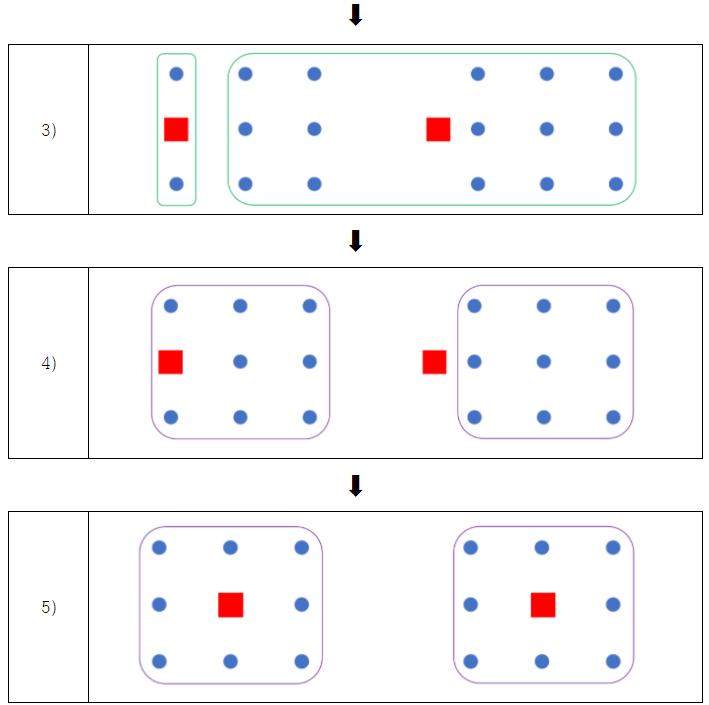

1) 군집의 수 K를 2로 가정했을 때, 좌측의 2개의 빨간색 점은 군집의 중심을 나타내고, 랜덤 초기화 되어있는 상태임 

2) 모든 개체들을 가장 가까운 중심에 군집으로 할당함. 2개의 박스가 각각 군집을 의미하고, 이 단계를 Expectation Step이라고 함  

3) 각각의 중심을 군집의 경계에 맞게 새롭게 업데이트함. 따라서 각 군집의 중심에 빨간색 점이 위치함. 이것이 Maximization Step임  

4) 3번 자료에 다시 Expectation Step을 적용함. 군집의 모습이 변형되었음을 확인 할 수 있음  

5) 4번 자료에 다시 Maximization Step을 적용함. 다시 업데이트 되면서 각각의 군집의 중심에 빨간색 점이 위치함

위와 같은 단계를 반복해서 거치다가 더이상 Expectation Step과 Maximization Step을 적용해도 결과가 바뀌지 않거나, 사용자가 사전에 지정한 반복의 수를 모두 채우게 되면 학습이 끝나게 됨

# 2. 실습

### 필요한 모듈 Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

### 데이터 탐색

In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
#150행의 데이터셋, 변수는 총 5개
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
#변수 형식 확인
iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [5]:
iris.describe(include='all')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


### 군집분석

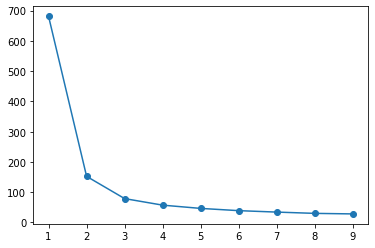

In [6]:
#elbow point 확인 결과, K=3이 최적의 수로 판단됨
def elbow(X):
    sse = []
    for i in range(1, 10):
        km = KMeans(n_clusters = i, init = 'k-means++', random_state=0)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(1, 10), sse, marker='o')
    plt.show()

kmeans = iris.drop(['Species'], axis=1)
elbow(kmeans)

In [7]:
#군집의 수를 3개로 설정하여 군집분석
model = KMeans(n_clusters=3, random_state=502).fit(kmeans)
iris['cluster'] = model.predict(kmeans)

In [8]:
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,cluster
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [9]:
#각 군집에 할당된 데이터 수 확인
iris['cluster'].value_counts()

1    62
0    50
2    38
Name: cluster, dtype: int64

In [10]:
#각 군집별 각 변수에 대한 평균값 확인
cluster_g = iris.groupby('cluster')
cluster_g.mean()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
cluster,,,,
0,5.006000,3.428000,1.462000,0.246000
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053


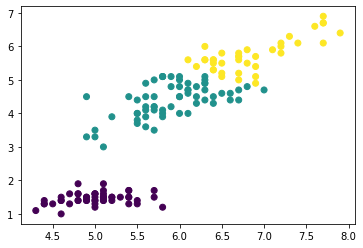

In [11]:
#군집 시각화 결과, 군집 간 경계가 뚜렷함을 확인
plt.scatter(x=iris['Sepal.Length'], y= iris['Petal.Length'], c=iris['cluster'])

In [12]:
centers = model.cluster_centers_
centers

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

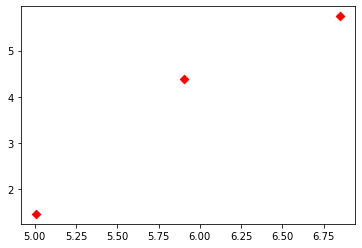

In [13]:
#각 군집의 중심 좌표
plt.scatter(x=centers[:,0], y=centers[:,2], marker='D', c='r')
plt.show()

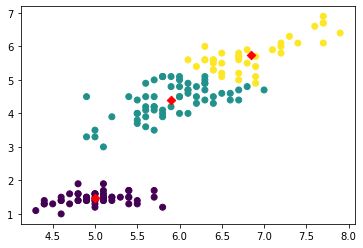

In [14]:
plt.scatter(x=iris['Sepal.Length'], y=iris['Petal.Length'], c=iris['cluster']) 
plt.scatter(x=centers[:,0], y=centers[:,2], marker='D', c='r')
plt.show() 

### 독립변수에 Clustering 추가 전 Decision Tree

In [23]:
from sklearn.model_selection import train_test_split

#Train:Test = 7:3으로 데이터 분할
y = iris['Species']
x = iris.drop(['cluster','Species'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state = 502, shuffle=True, stratify=y)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#분리 기준으로 지니지수를 사용하는 의사결정나무의 Train 성능
Dtree = DecisionTreeClassifier(criterion="gini")
Dtree.fit(X_train, Y_train)
y_pred_dtree_train = Dtree.predict(X_train)
acc_Dtree_train = round(accuracy_score(y_pred_dtree_train, Y_train), 4)
print(acc_Dtree_train)

y_pred_dtree_test = Dtree.predict(X_test)
acc_Dtree_test = round(accuracy_score(y_pred_dtree_test, Y_test), 4)
print(acc_Dtree_test)

1.0
0.9111


In [25]:
!pip install dmba
from dmba import classificationSummary
from sklearn.metrics import confusion_matrix

classificationSummary(Y_train, y_pred_dtree_train)

cm_sm = confusion_matrix(Y_train, y_pred_dtree_train)

sensitivity_sm = cm_sm[1,1]/(cm_sm[1,0]+cm_sm[1,1])
print('Sensitivity : ', sensitivity_sm )

specificity_sm = cm_sm[0,0]/(cm_sm[0,0]+cm_sm[0,1])
print('Specificity : ', specificity_sm)

precison_sm = cm_sm[1,1]/(cm_sm[0,1]+cm_sm[1,1])
print('precison : ', precison_sm)

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual  0  1  2
     0 35  0  0
     1  0 35  0
     2  0  0 35
Sensitivity :  1.0
Specificity :  1.0
precison :  1.0


In [26]:
classificationSummary(Y_test, y_pred_dtree_test)

cm_sm = confusion_matrix(Y_test, y_pred_dtree_test)

sensitivity_sm = cm_sm[1,1]/(cm_sm[1,0]+cm_sm[1,1])
print('Sensitivity : ', sensitivity_sm )

specificity_sm = cm_sm[0,0]/(cm_sm[0,0]+cm_sm[0,1])
print('Specificity : ', specificity_sm)

precison_sm = cm_sm[1,1]/(cm_sm[0,1]+cm_sm[1,1])
print('precison : ', precison_sm)

Confusion Matrix (Accuracy 0.9111)

       Prediction
Actual  0  1  2
     0 15  0  0
     1  0 13  2
     2  0  2 13
Sensitivity :  1.0
Specificity :  1.0
precison :  1.0


### 독립변수에 Clustering 추가 후 Decision Tree

In [27]:
from sklearn.model_selection import train_test_split

#Train:Test = 7:3으로 데이터 분할
y = iris['Species']
x = iris.drop('Species', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state = 502, shuffle=True, stratify=y)

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#분리 기준으로 지니지수를 사용하는 의사결정나무의 Train 성능
Dtree = DecisionTreeClassifier(criterion="gini")
Dtree.fit(X_train, Y_train)
y_pred_dtree_train = Dtree.predict(X_train)
acc_Dtree_train = round(accuracy_score(y_pred_dtree_train, Y_train), 4)
print(acc_Dtree_train)

y_pred_dtree_test = Dtree.predict(X_test)
acc_Dtree_test = round(accuracy_score(y_pred_dtree_test, Y_test), 4)
print(acc_Dtree_test)

1.0
0.9333


In [29]:
from dmba import classificationSummary
from sklearn.metrics import confusion_matrix

classificationSummary(Y_train, y_pred_dtree_train)

cm_sm = confusion_matrix(Y_train, y_pred_dtree_train)

sensitivity_sm = cm_sm[1,1]/(cm_sm[1,0]+cm_sm[1,1])
print('Sensitivity : ', sensitivity_sm )

specificity_sm = cm_sm[0,0]/(cm_sm[0,0]+cm_sm[0,1])
print('Specificity : ', specificity_sm)

precison_sm = cm_sm[1,1]/(cm_sm[0,1]+cm_sm[1,1])
print('precison : ', precison_sm)

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual  0  1  2
     0 35  0  0
     1  0 35  0
     2  0  0 35
Sensitivity :  1.0
Specificity :  1.0
precison :  1.0


In [30]:
classificationSummary(Y_test, y_pred_dtree_test)

cm_sm = confusion_matrix(Y_test, y_pred_dtree_test)

sensitivity_sm = cm_sm[1,1]/(cm_sm[1,0]+cm_sm[1,1])
print('Sensitivity : ', sensitivity_sm )

specificity_sm = cm_sm[0,0]/(cm_sm[0,0]+cm_sm[0,1])
print('Specificity : ', specificity_sm)

precison_sm = cm_sm[1,1]/(cm_sm[0,1]+cm_sm[1,1])
print('precison : ', precison_sm)

Confusion Matrix (Accuracy 0.9333)

       Prediction
Actual  0  1  2
     0 15  0  0
     1  0 13  2
     2  0  1 14
Sensitivity :  1.0
Specificity :  1.0
precison :  1.0


### 결론

#### 실습에 사용한 데이터는 iris 데이터로, 연속형 변수와 범주형 변수가 혼합된 형태의 데이터이다.

연속형 변수들만을 사용해서 K-means Clustering을 진행했다. 사전에 k의 개수를 지정하는 과정에 있어서는 elbow point를 확인하였다. 확인 결과, k가 3인 지점부터 그래프의 기울기가 급격히 완만해지는 것을 발견했고, 이를 통해 k를 3으로 설정하고 군집분석을 진행했다.

추가로, 군집분석의 결과를 하나의 독립변수로 추가 생성하였을 때, 분류모형의 성능향상에 도움이 되는지를 확인해보았다. 데이터셋을 Train Set과 Test Set으로 7:3의 비율로 분할하였고, 두 개의 Decision Tree를 생성하였다. 각각의 Decision Tree에는 하나에는 독립변수로 Clustering 결과를 추가하였고, 하나에는 추가하지 않은 상태로 성능평가를 진행하였다.

결과적으로 워낙 분류가 잘되는 예제 데이터인 탓에 다이나믹한 성능 차이를 확인할 수는 없었으나, Clustering 결과를 독립변수로 추가한 후, 추가하기 전에 비해 Test Set에 대한 분류 정확도가 상승했음을 확인할 수 있었다. Clustering이 모델링에 앞서 사전 데이터 탐색을 효과적으로 진행하는 것에 그치지 않고, 경우에 따라서는 하나의 독립변수로 활용되어 모델 성능 향상에 도움을 줄 수 있다는 점을 새로 공부할 수 있었다.